<a href="https://colab.research.google.com/github/alvianputrap/Text-Mining/blob/master/TextMining_DTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alvian Putra Pamungkas-DS0103**

**Text Mining**
Text mining proses penganalisisan teks guna menyarikan informasi yang bermanfaat untuk tujuan tertentu.

Import Library and Data Set

In [41]:
! pip3 install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
! pip3 install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/alvianputrap/Text-Mining/master/IDHSD_RIO_unbalanced_713_2017.txt', sep='\t', encoding = "ISO-8859-1", dtype=str)
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [43]:
df.tail()

,Label,Tweet
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."
712,HS,Mudah2an gw ketemu sama SI BABI IWAN BOPENG DI...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


Data Prepocessing

In [45]:
print(df.isnull().values.any())

False


In [46]:
count_label =df.Label.value_counts().to_frame()
px.bar(data_frame=count_label, x=count_label.index , y='Label')

berdasarkan data set non HS sejumlah 453, dan HS sejumlah 260

Data Cleaning

In [47]:
df['Tweet'] = df['Tweet'].str.lower()
df['Tweet'] = df['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'rt', '', regex=True)
df['Tweet'] = df['Tweet'].str.replace('\d+', '')
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
df["Tweet"] = df['Tweet'].str.strip()

Tokenization

In [48]:
df["Tweet"] = df["Tweet"].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('indonesian'))
df["Tweet"] = df["Tweet"].apply(lambda x: [item for item in x if item not in stop_words])

Steaming

In [51]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df["Tweet"] = df["Tweet"].apply(lambda x: [ stemmer.stem(item) for item in x])
df.head()

,Label,Tweet
0,Non_HS,"[spardaxyz, fadli, zon, mendagri, nonaktif, ah..."
1,Non_HS,"[baguscondromowo, luka, aksi, rangka, penjara,..."
2,Non_HS,"[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,Non_HS,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,"[lisdaulay, waspada, ktp, palsukawal, pilkada]"


In [52]:
df.tail()

,Label,Tweet
708,HS,"[muka, si, babi, ahok, tuh, yg, serbet, lantai..."
709,HS,"[bang, hancur, merka, bang, musnah, china, bab..."
710,HS,"[sapa, yg, bilang, ahok, anti, korupsi, klo, g..."
711,HS,"[gw, ngimpi, sentilin, biji, babi, ahok, pceta..."
712,HS,"[mudah, gw, ketemu, si, babi, iwan, bopeng, tp..."


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


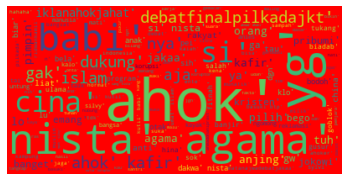

In [54]:
word = df.Tweet[df['Label']=='HS'].astype('string')
word.head()
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="red").generate_from_text(' '.join(word))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Set a Data as a Data Train and Data Set

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(df['Tweet'] , df['Label'], shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(499,)
(214,)
(499,)
(214,)


Neural Network (Jaringan Syaraf Buatan)/ANN

In [59]:
ann = make_pipeline(TfidfVectorizer(lowercase=False, preprocessor=' '.join), MLPClassifier())

# grid searh to choose the best (combination of) hyperparameters
parameter_space = {
    'mlpclassifier__hidden_layer_sizes': [(10,30,10),(20,)],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam'],
    'mlpclassifier__alpha': [0.0001, 0.05],
    'mlpclassifier__learning_rate': ['constant','adaptive'],
}

gs_ann = GridSearchCV(estimator=ann, 
                      param_grid=parameter_space,
                      scoring='accuracy',
                      cv=2,
                    )

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_ann_scores = cross_val_score(gs_ann, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_ann.fit(X_train, y_train)
gs_ann_best=gs_ann.best_estimator_
gs_ann_best.fit(X_train, y_train)

y_pred_ann = gs_ann_best.predict(X_test)

acc_ann = metrics.accuracy_score(y_test, y_pred_ann)
prec_ann = metrics.precision_score(y_test, y_pred_ann, pos_label='Non_HS')
rec_ann = metrics.recall_score(y_test, y_pred_ann, pos_label='Non_HS')
f1_ann = metrics.f1_score(y_test, y_pred_ann, pos_label='Non_HS')
kappa_ann = metrics.cohen_kappa_score(y_test, y_pred_ann)

print("Accuracy:", acc_ann)
print("Precision:", prec_ann)
print("Recall:", rec_ann)
print("F1 Score:", f1_ann)
print("Cohens Kappa Score:", kappa_ann)

# Visualize ROC Curve
y_pred_ann_proba = gs_ann_best.predict_proba(X_test)[::,1]
fprann, tprann, _ = metrics.roc_curve(y_test,  y_pred_ann_proba, pos_label="Non_HS")
aucann = metrics.roc_auc_score(y_test, y_pred_ann_proba)

Accuracy: 0.8785046728971962
Precision: 0.8768115942028986
Recall: 0.9307692307692308
F1 Score: 0.9029850746268656
Cohens Kappa Score: 0.7408718330849479


Support Vexctor Machine/SVM

In [60]:
svm = make_pipeline(TfidfVectorizer(lowercase=False, preprocessor=' '.join), SVC(random_state=1, probability=True))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1]
pg_svm = [{'svc__C':r, 'svc__kernel':['linear']}]

gs_svm = GridSearchCV(estimator= svm,                    
                    param_grid= pg_svm,
                    scoring='accuracy',
                    cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

y_pred_svm = gs_svm_best.predict(X_test)

acc_svm = metrics.accuracy_score(y_test, y_pred_svm)
prec_svm = metrics.precision_score(y_test, y_pred_svm, pos_label='Non_HS')
rec_svm = metrics.recall_score(y_test, y_pred_svm, pos_label='Non_HS')
f1_svm = metrics.f1_score(y_test, y_pred_svm, pos_label='Non_HS')
kappa_svm = metrics.cohen_kappa_score(y_test, y_pred_svm)

print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)
print("Cohens Kappa Score:", kappa_svm)

# Visualize ROC Curve
y_pred_svm_proba = gs_svm_best.predict_proba(X_test)[::,1]
fprsvm, tprsvm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba, pos_label="Non_HS")
aucsvm = metrics.roc_auc_score(y_test, y_pred_svm_proba)

Accuracy: 0.8785046728971962
Precision: 0.8768115942028986
Recall: 0.9307692307692308
F1 Score: 0.9029850746268656
Cohens Kappa Score: 0.7408718330849479


Visualization output to comparation between ANN and SVM to ROC Curve

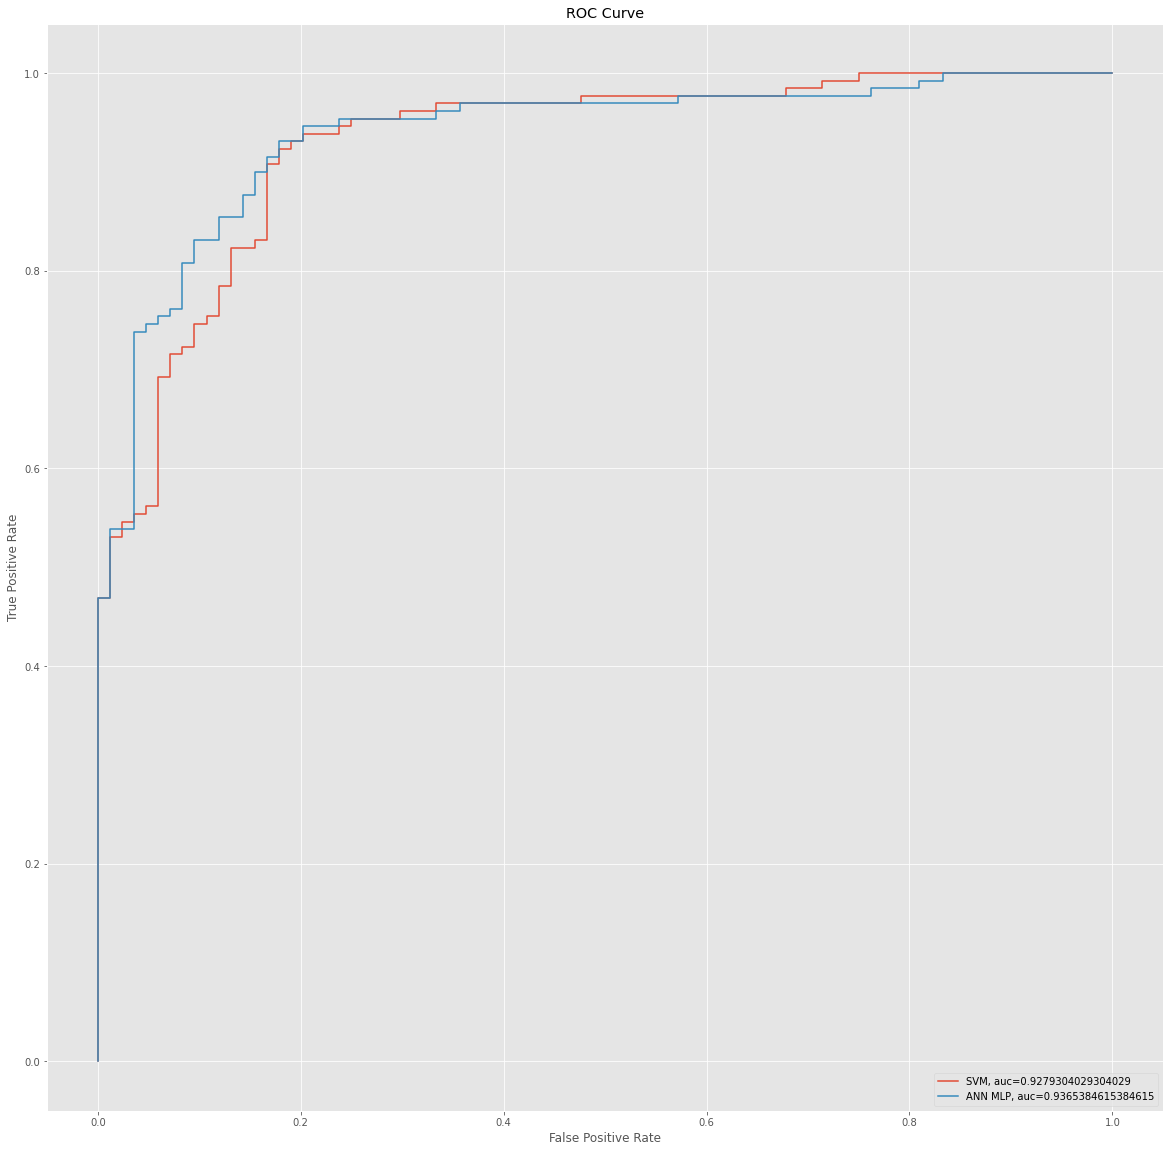

In [63]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')
plt.plot(fprsvm,tprsvm,label="SVM, auc="+str(aucsvm))
plt.plot(fprann,tprann,label="ANN MLP, auc="+str(aucann))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Berdasarkan analisis maka lebih efektif menggunakan ANN dengan tingkat auc 0.9365 pada ROC curve